In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


def txt2csv(input:str, output:str) -> None:
    """
    Read a txt file then turn it into a csv file 
    """
    csv_file = pd.read_csv(input, sep='\t', header=None, names=['text', 'label'])
    print(csv_file.info()) # show file

    csv_file.to_csv(output, index=False)

txt2csv("../data/raw/sentiment_labelled/amazon_cells_labelled.txt","../data/csv/amazon_cells_labeled.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


## Use different methods to evaluate the quality of our corpus
- Zipf law
- Heaps' law
- P value and correlation socres by measuring the relation between length and label 

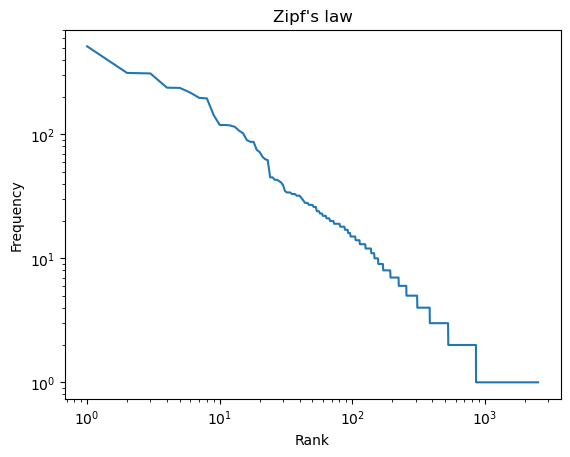

In [2]:
data = pd.read_csv("../data/csv/amazon_cells_labeled.csv")

all_words = " ".join(data["text"]).lower().split()
word_counts = Counter(all_words)
sorted_counts = sorted(word_counts.values(), reverse=True)
ranks = range(1, len(sorted_counts) + 1)

plt.loglog(ranks, sorted_counts)
plt.title("Zipf's law")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.show()

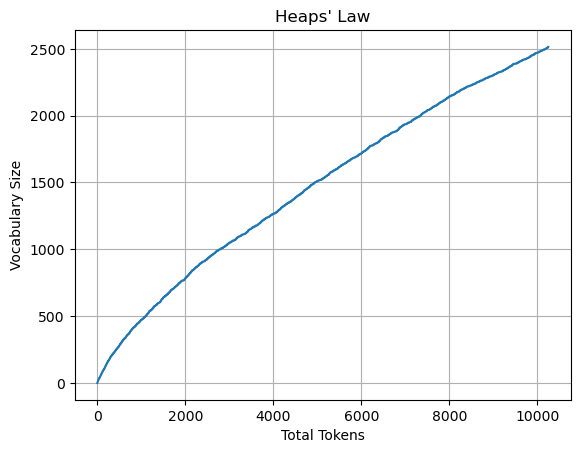

In [16]:
vocab = set()
tokens = []
vocab_size = []
token_size = []

for word in all_words:
    tokens.append(word)
    vocab.add(word)
    vocab_size.append(len(vocab))
    token_size.append(len(tokens))

plt.plot(token_size, vocab_size)
plt.title("Heaps' Law")
plt.xlabel("Total Tokens")
plt.ylabel("Vocabulary Size")
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import pearsonr

data['length'] = data['text'].str.split().apply(len)
corr, p_value = pearsonr(data['length'], data['label'])
print(f"correlation score {corr}, p_value {p_value}")
# p_value > 0.05 means the length of comments does not have a visible relation with each other

correlation score -0.04966883908290434, p_value 0.11649166904712385


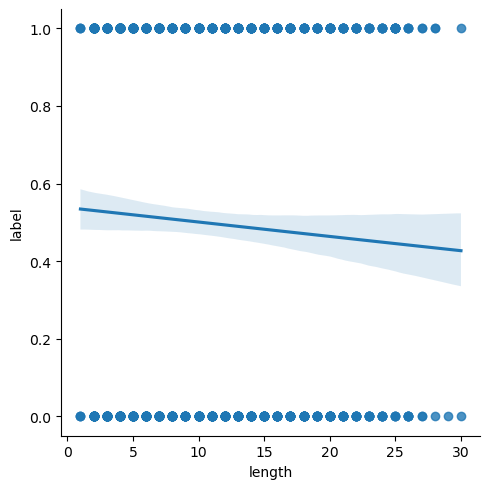

In [19]:
import seaborn as sns

sns.lmplot(data=data, x='length', y='label', logistic=True)


After thes tests, we can discover that our corpus can be qualified as good quality generally, since it satisfies zipf's law and heaps' law.